<a href="https://colab.research.google.com/github/Benitmulindwa/Cheminformatics/blob/main/fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rdkit pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 9.4 MB/s eta 0:00:00


In [16]:
import pandas as pd
import numpy as np
import seaborn as sn
#---------------------- RDKit packages
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning

In [40]:
dataset = pd.read_csv('https://raw.githubusercontent.com/gashawmg/HOMO-LUMO-Enegry-gap-Prediction/master/Orbital_Energies_input_data.csv')
dataset.head(10)

,SMILES,Energygap
0,Cc1ccc(cc1)C(F)(F)F,197.749421
1,OC(=O)CCCCl,247.493942
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327
3,Nc1ccc(Cl)c(Cl)c1,169.027707
4,C[C@@H](CCO)CCC=C(C)C,209.569808
5,OC(C=C)C=C,210.979194
6,O=N(=O)c1ccc(Cl)c(c1)N(=O)=O,168.833179
7,O=CC1CCCCC1,213.451579
8,COc1ccc(cc1)C#C,171.191985
9,Brc1cncnc1,188.344944


In [41]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(dataset,'SMILES', 'structure')

In [42]:
dataset.head()

,SMILES,Energygap,structure
0,Cc1ccc(cc1)C(F)(F)F,197.749421,<rdkit.Chem.rdchem.Mol object at 0x7d556da85a80>
1,OC(=O)CCCCl,247.493942,<rdkit.Chem.rdchem.Mol object at 0x7d55797f31b0>
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327,<rdkit.Chem.rdchem.Mol object at 0x7d556da78270>
3,Nc1ccc(Cl)c(Cl)c1,169.027707,<rdkit.Chem.rdchem.Mol object at 0x7d556da780b0>
4,C[C@@H](CCO)CCC=C(C)C,209.569808,<rdkit.Chem.rdchem.Mol object at 0x7d556da78350>


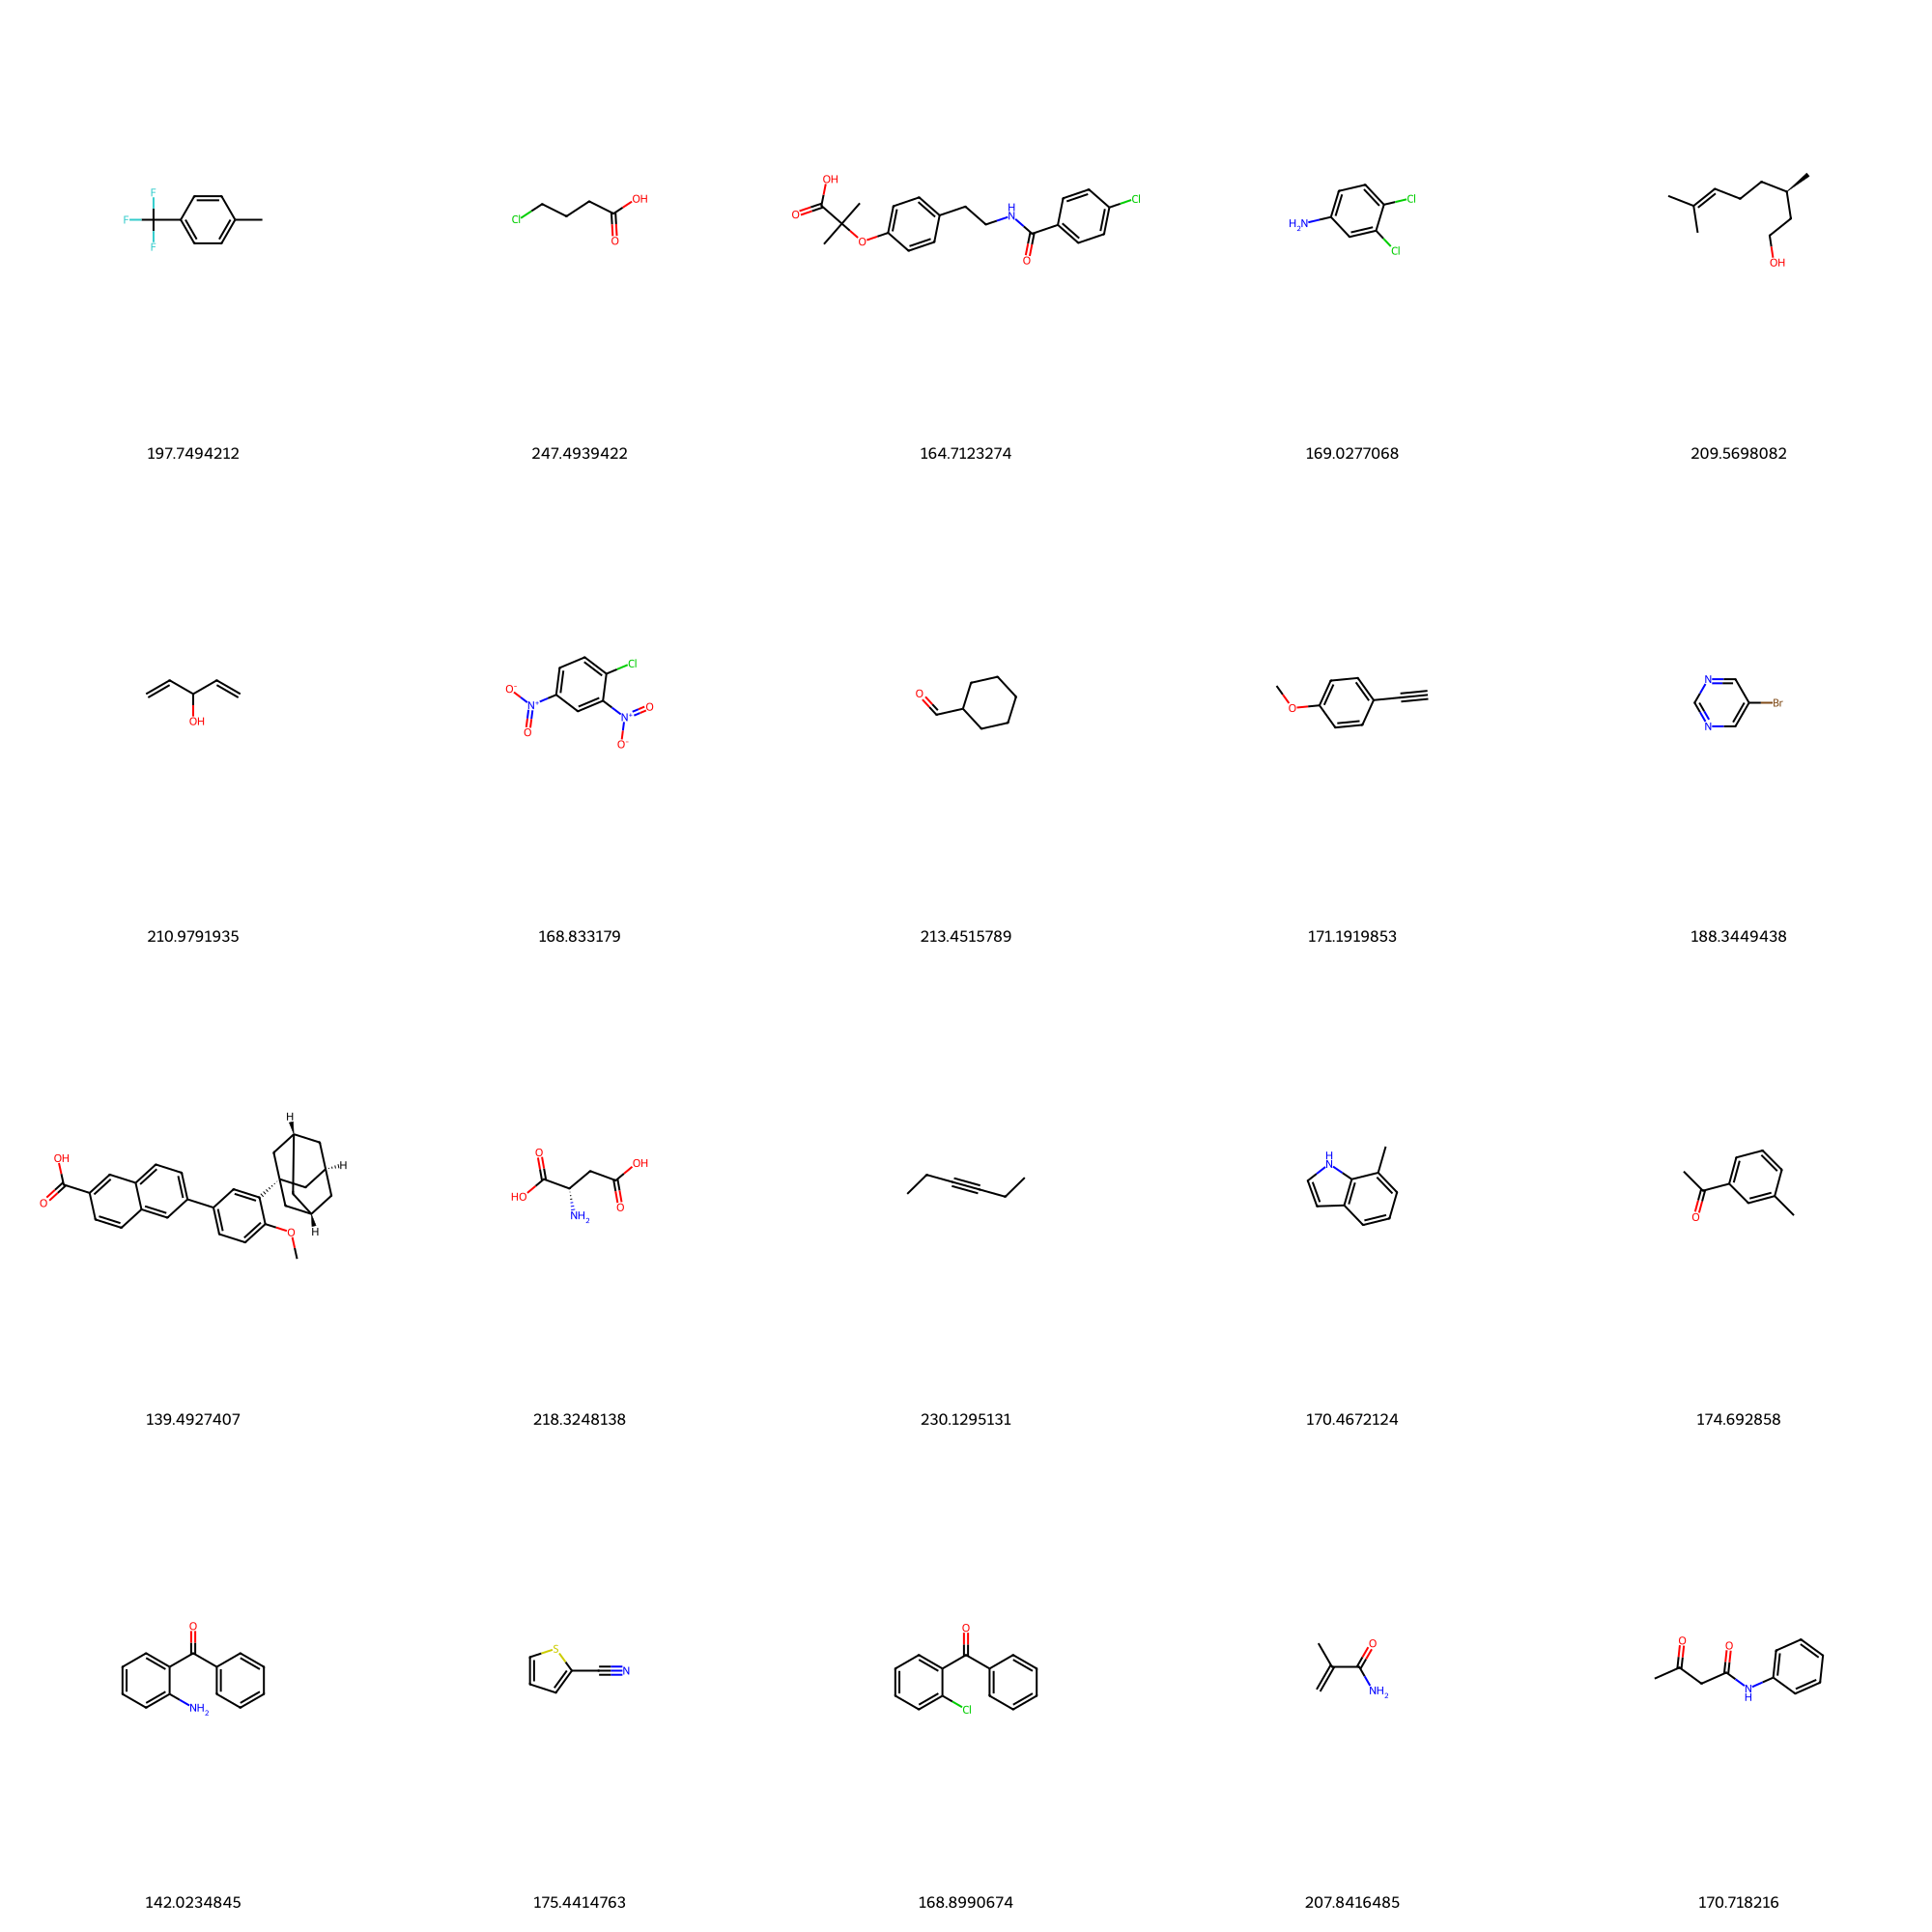

In [47]:
from re import L
from rdkit.Chem import Draw
Draw.MolsToGridImage([x for x in dataset['structure']][:20], molsPerRow=5, maxMols=100,subImgSize=(400,500), legends=[str(x) for x in dataset['Energygap']] )

# 1. MACCS-keys Fingerprint (166 public keys)

- it's 162bits
- it's mainly used for substructure search

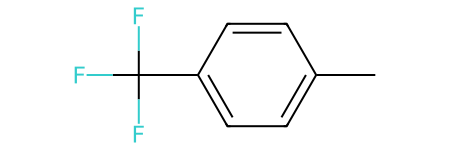

In [49]:
dataset.structure[0]